In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df = df[df["label"] != "label"]
df["label"] = df["label"].astype(int)
df.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,49,52,56,55,56,34,35,36,35,...,76,87,85,85,95,94,98,97,85,97
1,7,95,59,60,60,53,53,51,49,51,...,95,92,95,95,91,96,96,94,93,95
2,7,28,98,103,102,98,99,100,98,33,...,140,128,140,136,132,136,134,134,134,134
3,7,62,6,7,85,88,25,2,73,118,...,54,181,2,79,87,191,186,88,7,35
4,7,99,98,103,99,97,102,101,100,110,...,76,70,71,72,74,70,68,68,68,68


In [3]:
def relu(Z):
	return np.maximum(0, Z)

def relu_derivative(Z):
	return Z > 0

def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
	m = y_true.shape[0]
	log_likelihood = -np.log(y_pred[range(m), y_true])
	loss = np.sum(log_likelihood) / m
	return loss

def one_hot(Y, C):
	Y = np.eye(C)[Y.reshape(-1)]
	return Y

In [4]:
class SimpleCNN:
	def __init__(self, input_size, hidden_size, output_size):
		self.W1 = np.random.randn(input_size, hidden_size) * 0.01
		self.b1 = np.zeros((1, hidden_size))
		self.W2 = np.random.randn(hidden_size, hidden_size) * 0.01
		self.b2 = np.zeros((1, hidden_size))
		self.W3 = np.random.randn(hidden_size, output_size) * 0.01
		self.b3 = np.zeros((1, output_size))
	
	def forward(self, X):
		self.Z1 = np.dot(X, self.W1) + self.b1
		self.A1 = relu(self.Z1)
		self.Z2 = np.dot(self.A1, self.W2) + self.b2
		self.A2 = relu(self.Z2)
		self.Z3 = np.dot(self.A2, self.W3) + self.b3
		self.A3 = softmax(self.Z3)
		return self.A3
	
	def backward(self, X, Y, learning_rate=0.01):
		m = Y.shape[0]
		Y = one_hot(Y, self.A3.shape[1])
		
		dZ3 = self.A3 - Y
		dW3 = (1/m) * np.dot(self.A2.T, dZ3)
		db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)
		
		dA2 = np.dot(dZ3, self.W3.T)
		dZ2 = dA2 * relu_derivative(self.Z2)
		dW2 = (1/m) * np.dot(self.A1.T, dZ2)
		db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
		
		dA1 = np.dot(dZ2, self.W2.T)
		dZ1 = dA1 * relu_derivative(self.Z1)
		dW1 = (1/m) * np.dot(X.T, dZ1)
		db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
		
		# Update weights and biases
		self.W1 -= learning_rate * dW1
		self.b1 -= learning_rate * db1
		self.W2 -= learning_rate * dW2
		self.b2 -= learning_rate * db2
		self.W3 -= learning_rate * dW3
		self.b3 -= learning_rate * db3


In [5]:

X = df.drop("label", axis=1).values
Y = np.array(df["label"].values)

# Example usage
learning_rate = 0.01
input_size = X.shape[1]
hidden_size = 100
output_size = 10
model = SimpleCNN(input_size, hidden_size, output_size)

predictions = model.forward(X)
model.backward(X, Y, learning_rate)

In [6]:
cost = []
epochs = 3001
learning_rate = 0.01
for i in range(epochs):
	predictions = model.forward(X)
	model.backward(X, Y, learning_rate)
	loss = cross_entropy_loss(predictions, Y)
	cost.append(loss)
	if i % 500 == 0:
		learning_rate = learning_rate / 1.2
		print(i)

0
500
1000
1500
2000
2500
3000


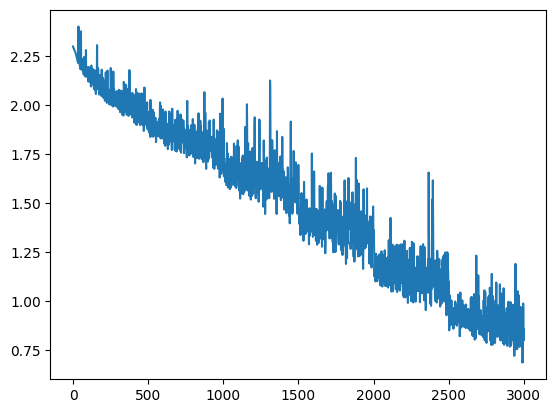

In [7]:
plt.plot( np.linspace(0, len(cost), len(cost)), np.array(cost))

In [8]:
df_test = pd.read_csv("test.csv")
df_test = df[df["label"] != "label"]
df_test["label"] = df["label"].astype(int)
df_test.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,49,52,56,55,56,34,35,36,35,...,76,87,85,85,95,94,98,97,85,97
1,7,95,59,60,60,53,53,51,49,51,...,95,92,95,95,91,96,96,94,93,95
2,7,28,98,103,102,98,99,100,98,33,...,140,128,140,136,132,136,134,134,134,134
3,7,62,6,7,85,88,25,2,73,118,...,54,181,2,79,87,191,186,88,7,35
4,7,99,98,103,99,97,102,101,100,110,...,76,70,71,72,74,70,68,68,68,68


In [9]:
def predict(model, X):
	logits = model.forward(X)
	return softmax(logits)

def test_model(model, X_test, y_test):
	predictions = predict(model, X_test)
	predicted_classes = np.argmax(predictions, axis=1)
	actual_classes = np.argmax(y_test, axis=1)
	accuracy = np.mean(predicted_classes == actual_classes)
	return accuracy

X_test = df_test.drop("label", axis=1).values
Y_test = np.eye(10)[np.array(df_test["label"].values)]

accuracy = test_model(model, X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 68.30%


BONUS TASK

In [10]:
X_bonus = pd.read_csv('bonus.csv').values
bonus = np.array(X_bonus)
bonus = bonus.T
bonus = bonus / 255.0

def bonus_prediction(index):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_bonus[:, index, None]
    prediction = predict(model, X_bonus)
    prediction = np.argmax(prediction, axis=1)

    print("Prediction: ", map[prediction[index]])
    
    current_image = bonus[:, index, None].reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  homer simpson


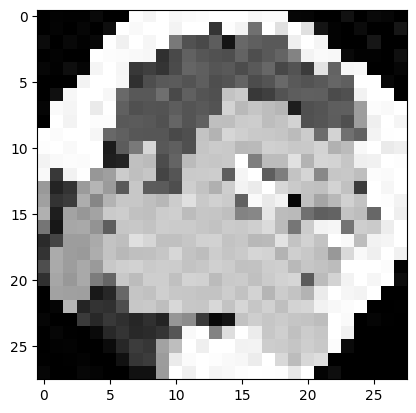

Prediction:  krusty the clown


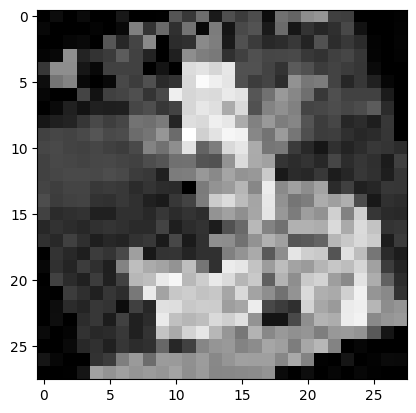

Prediction:  krusty the clown


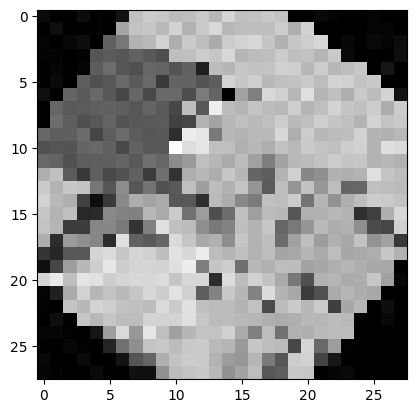

Prediction:  milhouse van houten


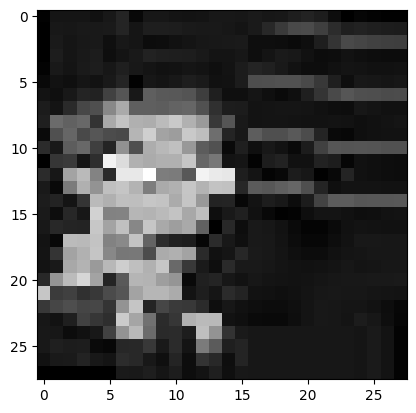

Prediction:  milhouse van houten


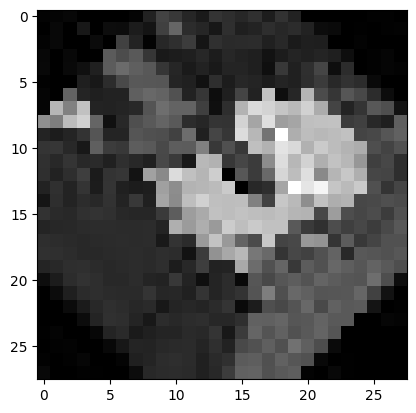

Prediction:  charles montgomery_burns


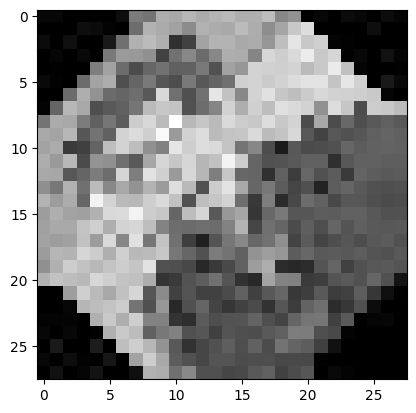

Prediction:  homer simpson


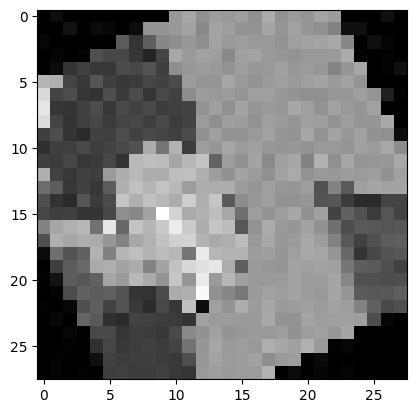

Prediction:  charles montgomery_burns


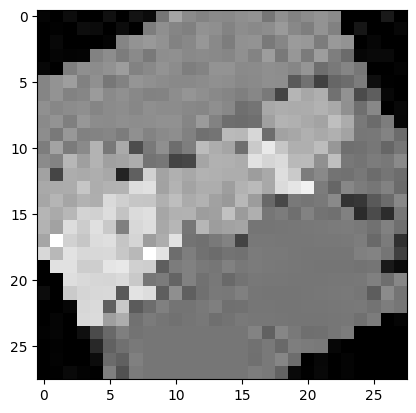

Prediction:  charles montgomery_burns


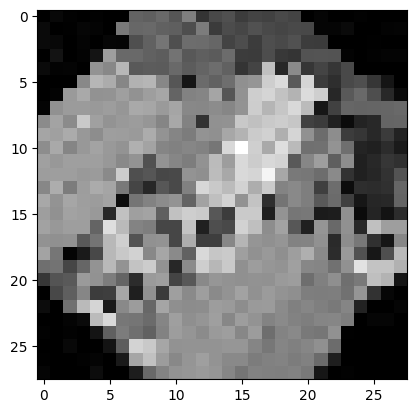

Prediction:  charles montgomery_burns


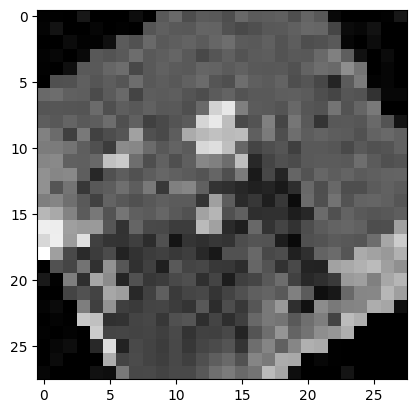

In [11]:
for i in range(10):
    bonus_prediction(i)

#bonus_prediction(0)